In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install tabula-py

You are using pip version 18.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import tabula

In [21]:
df = tabula.read_pdf('VIT - LIST OF DONOR WEBSITE-converted.pdf')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
Unnamed: 0     47 non-null object
Unnamed: 1     2 non-null object
Unnamed: 2     48 non-null object
Unnamed: 3     47 non-null object
Unnamed: 4     48 non-null object
Unnamed: 5     47 non-null object
Online         13 non-null object
Unnamed: 7     1 non-null object
Unnamed: 8     2 non-null object
Unnamed: 9     1 non-null object
Unnamed: 10    2 non-null object
Unnamed: 11    2 non-null object
dtypes: object(12)
memory usage: 4.8+ KB


In [64]:
df_amt = df.iloc[4:, [2,4]]
df_amt.columns=['DonationDate', 'Amount']
df_amt

,DonationDate,Amount
4,01.04.20,22582.5
5,4/1/2020,206
6,4/2/2020,151
7,4/2/2020,500
8,4/2/2020,500
9,4/2/2020,201
10,4/2/2020,21000
11,4/2/2020,2000
12,4/3/2020,500
13,4/3/2020,1001


In [44]:
def fix_date(dt):
    (dd, mm, yy) = tuple(dt.split('.'))
    yy = '20'+yy
    new_dt = '/'.join(list([mm, dd, yy]))
    return new_dt

In [45]:
fix_date('01.04.20')

'04/01/2020'

In [46]:
df_amt.loc[df_amt.DonationDate.str.contains("\."), 'DonationDate'] = \
df_amt.loc[df_amt.DonationDate.str.contains("\."), 'DonationDate'].apply(fix_date)
df_amt.head()

,DonationDate,Amount
4,04/01/2020,22582.5
5,4/1/2020,206
6,4/2/2020,151
7,4/2/2020,500
8,4/2/2020,500


In [48]:
df_amt['DonationDate'] = pd.to_datetime(df_amt['DonationDate'])
df_amt.head()

,DonationDate,Amount
4,2020-04-01,22582.5
5,2020-04-01,206
6,2020-04-02,151
7,2020-04-02,500
8,2020-04-02,500


In [56]:
df_amt['Amount'] = df_amt.Amount.astype(float)

In [60]:
df_amt.groupby('DonationDate').sum().reset_index()

,DonationDate,Amount
0,2020-04-01,22788.5
1,2020-04-02,24352.0
2,2020-04-03,199703.0


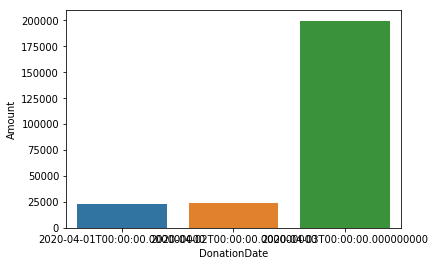

In [63]:
sns.barplot(x='DonationDate', y='Amount', data=df_amt.groupby('DonationDate').sum().reset_index())